# <font color='darkblue'>Teorema del eje intermedio</font>

------

Integrantes:

- Daniela Andrea Torres Gómez
- Andrea Valencia

----

Este fenómeno de torsión parece ser relativamente nuevo para la mecánica clásica y se puede evidenciar en una raqueta de tennis. El experimento consta de lanzar la raqueta al aire intentando hacerla girar alrededor del eje intermedio (el eje en el plano de la cara que es perpendicular al mango) y luego de una rotación agarrarla por el mango, sin embargo, la raqueta siempre hace una media vuelta tal que ahora la otra cara esta arriba. 

En general el teorema describe que la rotación, de cualquier objeto que tiene tres momentos diferentes de inercia, alrededor de su primer y tercer ejes es estable, mientras que la rotación alrededor de su segundo eje principal (o eje intermedio) no lo es [1]. 

<img src="Dzhanibekov_effect.gif" style="width:500px;height:300px;">
<caption><center> <u> <font color='purple'> **Figura 1** </u><font color='purple'>  : **Efecto Dzhanibekov**<br> También conocido como efecto Dzhanibekov, debido al  cosmonauta soviético Vladimir Dzhanibekov, quién notó sus efectos durante la misión Soyuz T-13 en 1985 </center></caption>

En condiciones libres de fuerzas externas, las ecuaciones de rotación de un top asimétrico alrededor de su centro de inercia (en el marco de referencia fijo en el cuerpo) con los ejes $(ê_1, ê_2, ê_2)$ dirigidos a lo largo de los tres ejes principales de inercia del cuerpo, son:


$$\dot{\Omega_1} =\frac {(I_2 - I_3)}{I_1} \Omega_2 \Omega_3$$
$$\dot{\Omega_2} =\frac {(I_3 - I_1)}{I_2} \Omega_3 \Omega_1$$
$$\dot{\Omega_3} =\frac {(I_1 - I_2)}{I_3} \Omega_1 \Omega_2$$

Este es un problema tridimensional de primer orden, regido por las ecuaciones de Euler, para $I1 < I2 < I3$, que corresponde también a los momentos de inercia de una raqueta. 


In [49]:
import matplotlib
import numpy as np
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline 

In [50]:
plt.rcParams['figure.figsize'] = 15, 7
axis_font = {'size' : 20}

matplotlib.rc('font', **axis_font)

In [54]:
def equations(y, t):
    W1, W2, W3 = y
    I1, I2, I3 = 1,2,3
    dydt = [((I2-I3)/I1)*W2*W3, ((I3-I1)/I2)*W1*W3, ((I1-I2)/I3)*W1*W2]
    
    return dydt


def solve(n, f, W1o, W2o, W3o):
    y0 = [W1o, W2o, W3o]
    t = np.linspace(0, 100, 1000)
    sol = odeint(f, y0, t)
    
    plt.plot(t, sol[:, 0], 'r', label= "$\Omega_1$")
    plt.plot(t, sol[:, 1], 'b', label= "$\Omega_2$")
    plt.plot(t, sol[:, 2], 'g', label= "$\Omega_3$")
    plt.legend()
    plt.xlabel('t')
    plt.ylabel("$\Omega(t)$")
    plt.grid()
    plt.show()
    
    return sol

def condi_initial():
    
    W1o = 0.0001
    W2o = 1.0
    W3o = 0.0001 
    
    sol = solve(1000, equations, W1o, W2o, W3o)
    
    return sol
    

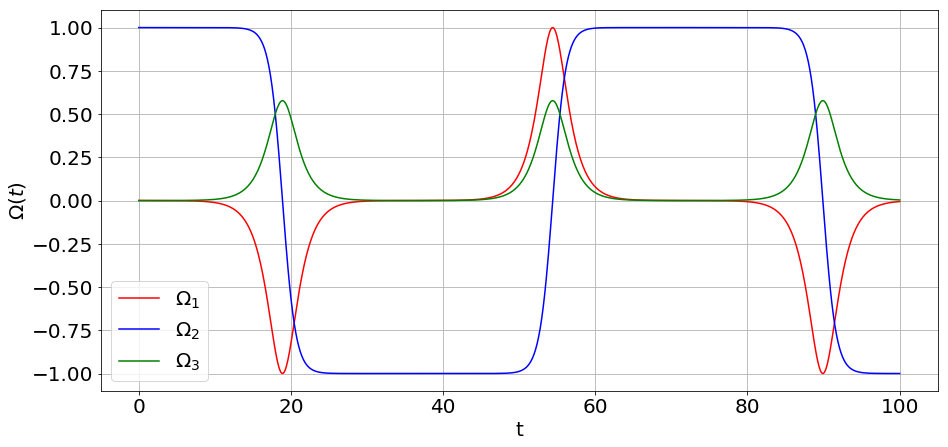

In [55]:
sol = condi_initial()

Se puede ver como el momento angular se almacena temporalmente en los componentes $\Omega_1$ y $\Omega_3$ de la velocidad angular durante el cambio de dirección de del segundo eje. 

## Referencias:

- [1] Proyectos Wikimedia: https://es.wikipedia.org/wiki/Teorema_del_eje_intermedio
- MechanicsSSAU https://www.youtube.com/watch?v=LR5hkgfRPno
- Ashbaugh, M.S., Chicone, C.C. & Cushman, R.H. J Dyn Diff Equat (1991) 3: 67. https://doi.org/10.1007/BF01049489